# 2. Exploratory Data Analysis

## 2.1 Introduction

I now have a data file for each antibiotic (azithromycin, ciprofloxacin, and ceftrixone) that contains:
<ul>
    <li>sample id for each strain</li>
    <li>minimum inhibitory concentration (MIC)</li>
    <li>whether the strain is resistant to the antibiotic</li>
    <li>year sample was taken</li>
    <li>country of origin</li>
    <li>continent of origin</li>
    <li>many columns of unitigs and whether or not they are present</li>
</ul>

My goal for this analysis is to gather more information about the differences between resistant and nonresistant strains, to identify unitigs highly correlated with resistance or sensitivity, and to identify possible clusters of unitigs.

## 2.2 Package Importing

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## 2.3 Data Loading

In [2]:
# Loading azithromycin data
azm_data = pd.read_csv('../data/interim/azm_data.csv')
azm_data.head()

,Sample_ID,mic_azm,r_azm,Year,Country,Continent,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,...,ACCGATGAGTTCGCCGGAATCGGTACGATTGAC,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG
0,ERR1549286,512.0,1,2015.0,UK,Europe,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,ERR1549290,512.0,1,2015.0,UK,Europe,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,ERR1549291,512.0,1,2015.0,UK,Europe,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,ERR1549287,512.0,1,2015.0,UK,Europe,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,ERR1549288,512.0,1,2015.0,UK,Europe,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [3]:
# Loading cip data
cip_data = pd.read_csv('../data/interim/cip_data.csv')
cip_data.head()

,Sample_ID,mic_cip,r_cip,Year,Country,Continent,ACGTTTATGCCGTTATCGATCCGATAGCCGGT,CATCTGCACCCTGTCGGCACTCGCCGCCTGAACCACCCCGTCCGGACAAGG,"CACAAAACTCGTTTCCTGCTCCGAAATGGGCGA,GTAAGGGCTTTCTTAAATTTGATTAAAGGTCGTCTGAA,AACCGAAACCGACCGCGCCGTCGAATATCAGGCGGTCGCACCGGAAGTACG",AAATCTTCCGCTTTAATCCATTTGCCGTCCGA,...,CGCCTATGTGCTGCAACTTTTGGACACCGCGCTCGC,GGAATCAGGACGATAAACAAAATGCTGCCGGCGAG,CGCTACATAAGGAGAACCCTAAAATGCCGCA,ACATCCTGCCATCCGACAAGCGGCGGCAACCGCCAAAAAC,TCTTGGGCGCCGTTTGTGGGTTTGTTTATCGCGCG,AAGCAGCGCACGCTGTGAATCACATCTTTCGCC,ACCGCGCCGGACAGGGTGCGCGTAAACGGCAGTTG,AACGACAATACACACACCCTTCCCCCGCGCC,AAATTCATCAAAGAGCAAAGCGATTGGAAACCTCTGCCTGCTAATGCCGGTGAGTTGACCC,"GCCGCCTTGTCCTGATTTTTGTTAATCCGCCA,AACCATAAGTCGGCAACTTCGTAAACCAGGTGGGACGGGTCTTTGTCTTTGGATGC,AGAAGCTCGGAATCGTTCAGCAATACGCCTGCG"
0,SRR1661154,0.500,0,1996.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,SRR1661156,16.000,1,1997.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,SRR1661157,0.016,0,1998.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,SRR1661158,0.500,0,2000.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,SRR1661159,0.063,0,2001.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [4]:
# Loading cfx data
cfx_data = pd.read_csv('../data/interim/cfx_data.csv')
cfx_data.head()

,Sample_ID,mic_cfx,r_cfx,Year,Country,Continent,ACCGGTCAGGGCGACGGGTTTGCGCCCTTTGAT,TGATACGGCGTGTAGGCGGTGTACCAGCCCGGG,CCGCACGGGGGAAATCCTCGCCTTGGCCAATACGCCCGCCTACGATCCCAACAG,GATATAACTGCGTCCGTCGGCATATTCGCCC,...,CATGTCTTTCGGTTATGGCCTGCAATTAAGC,GGCACGGTTGCGCCGCTGTTCGCTGTCTGCCCGGCCGGG,AAAACCGCCATCAGTTTTCCGCTCATCGGAGGA,TTGTTTTTCAAAGCTGACCGGCAACAATTCGCCGTCATGGGTCAAGACAGTATAGGCACG,TTGCCCGTAGTGACGATTTCTACGTTCAGGTTTGCTTCGATCGGAAATTGG,GTCGATGTTTTGAGGAACAAACTCGAACAGAAA,ACCGCCATCAGTTTTCCGCTCATCGGAGGAAGGG,"TCCCAACAGACCCGGCCGGGCAGACAGCGAACAG,GACGGTTTCTTTATTTGATTTGAACGGAAAAACCAT,CGTCAAAGACGCCAACGACGCCGGCACCAAAATCGACAC,CCATCAAAACCGCCATCAGTTTTCCGCTCATCGGA,CCAAGCCACGTCGGCATTCGGTTTCGAGCCGATGTCCA,TTCAGGCTGCCGCCCATAATTTTTTTGAAGGGC",GGAACGCCTGTCCGAGCTTGTCGATGTGCCGGT,CAGCGCATCGGTCATTGTCGGACTCGAGCCGCTGCTGATG
0,SRR1661154,0.125,0,1996.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,SRR1661156,0.063,0,1997.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,SRR1661157,0.063,0,1998.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,SRR1661158,0.250,1,2000.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,SRR1661159,0.001,0,2001.0,Canada,America,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [5]:
# rename mic and resistance columns
azm_data = azm_data.rename(columns = {'mic_azm':'mic','r_azm':'resistant'})
cip_data = cip_data.rename(columns = {'mic_cip':'mic','r_cip':'resistant'})
cfx_data = cfx_data.rename(columns = {'mic_cfx':'mic','r_cfx':'resistant'})

In [6]:
# organize data into dictionary
data_all = {
    'azm': azm_data,
    'cip': cip_data,
    'cfx': cfx_data
}

## 2.4 Missing Values

### 2.4.1 Non Unitig Data Missing Values

As the data consists of 200-8000 columns of data, I first looked at the missing counts for the non unitig data. Of these, the most important is 'resistant' as that is my target feature for classification.

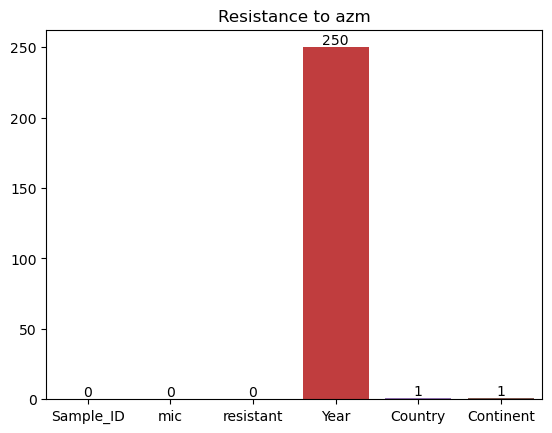

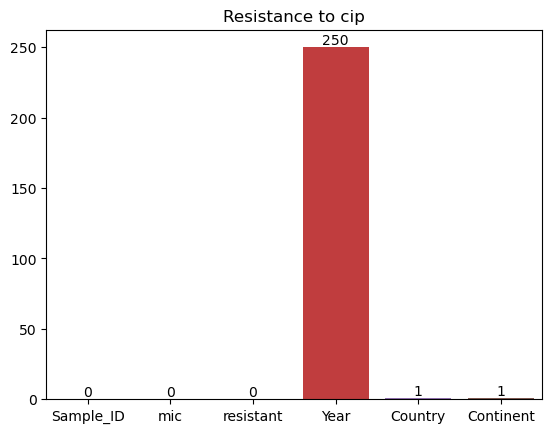

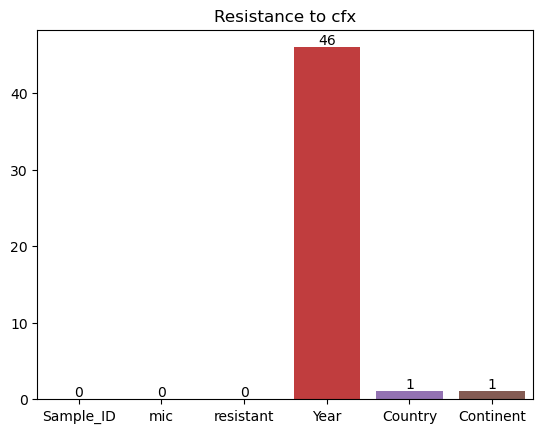

In [7]:
# plot missing values
for name, data in data_all.items():
    missing_counts = data.iloc[:,:6].isna().sum()
    g = sns.barplot(x=missing_counts.index, y=missing_counts.values)
    g.bar_label(container=g.containers[0], labels=missing_counts.values)
    g.set_title(f"Resistance to {name}")
    plt.show()

There are no missing values in 'resistant'. There are some missing values for 'Year' for each dataset. However, I will not be using this as a feature as the model will be based on unitig data. There is one sample missing location data of country and continent.

### 2.4.2 Unitig Data Missing Values

As I cannot plot all the unitigs, I checked how many unitigs in each dataset contained any missing values.

In [8]:
unitigs_with_missing = {}
for name, data in data_all.items():
    missing_counts = data.iloc[:,6:].isna().sum()
    missing_counts = missing_counts[missing_counts>0]
    print(f"{name} data has {len(missing_counts)} unitigs with missing values.")

azm data has 0 unitigs with missing values.
cip data has 0 unitigs with missing values.
cfx data has 0 unitigs with missing values.


No unitigs contained missing values, thankfully.

## 2.5 Resistance Analysis

### 2.5.1 Number of Resistant Strains

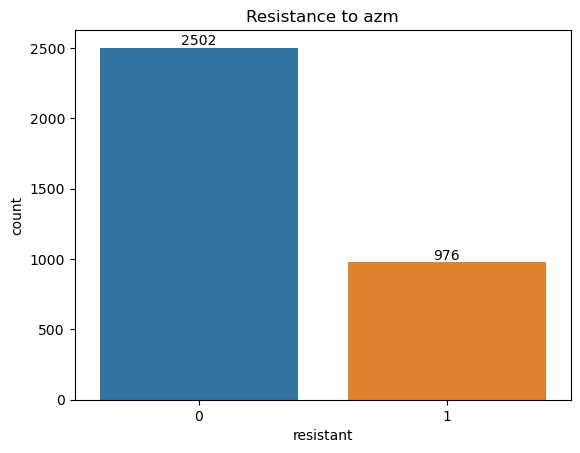

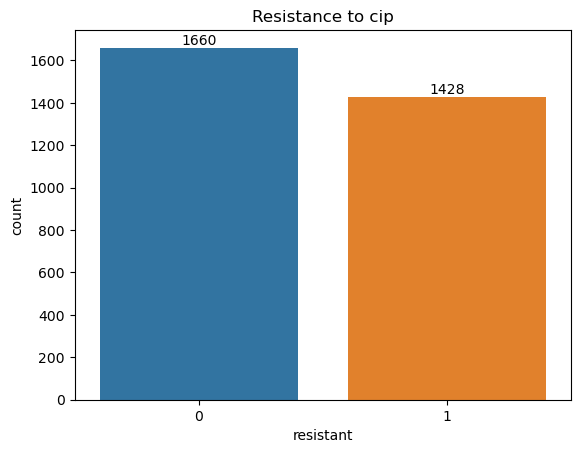

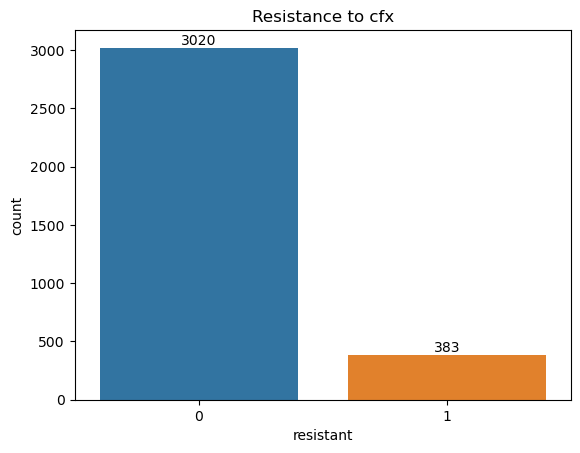

In [9]:
# plot resistance data
for name, data in data_all.items():
    g = sns.countplot(x='resistant',data=data)
    values = data['resistant'].value_counts(ascending=False).values
    g.bar_label(container=g.containers[0], labels=values)
    g.set_title(f"Resistance to {name}")
    plt.show()

cip has the largest amount of resistant strains at 1428 and cfx the least at 383. The cfx data is quite unbalanced, which will have to be addressed.

### 2.5.2 Number of unitigs

Next I looked at the total number of unitigs in each same in hope of finding a means of reducing dimensionality.

In [10]:
# add total unitigs column
azm_data['total_unitig_count'] = azm_data[azm_data.columns[6:]].sum(axis=1)
cip_data['total_unitig_count'] = cip_data[cip_data.columns[6:]].sum(axis=1)
cfx_data['total_unitig_count'] = cfx_data[cfx_data.columns[6:]].sum(axis=1)

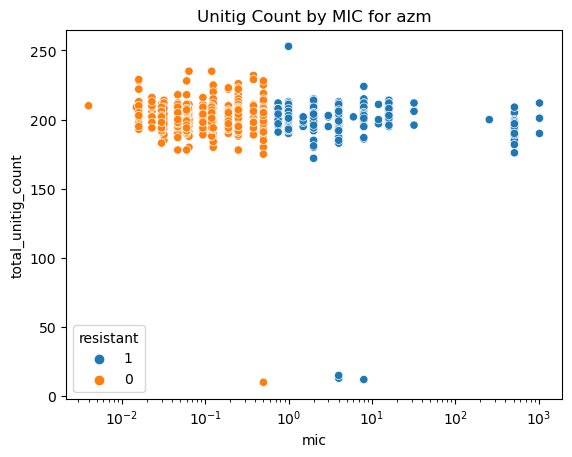

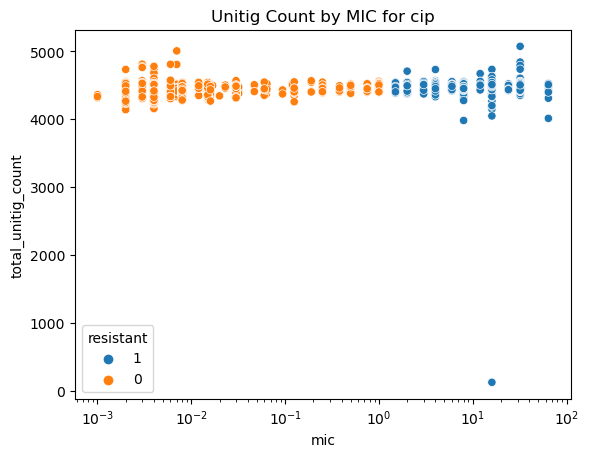

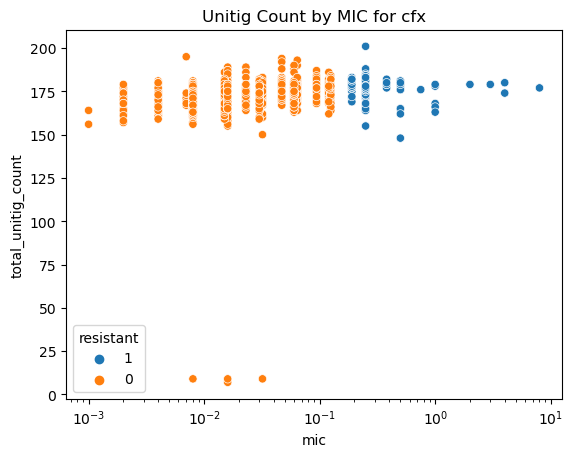

In [11]:
for name, data in data_all.items():
    g = sns.scatterplot(x='mic', y='total_unitig_count', data=data,
                        hue='resistant', hue_order=[1,0])
    plt.xscale('log')
    g.set_title(f"Unitig Count by MIC for {name}")
    plt.show()

The mic does not seem to affect the total unitig count. Notably, each dataset has a couple outliers with extremely low total unitig counts.

### 2.5.3 Locations

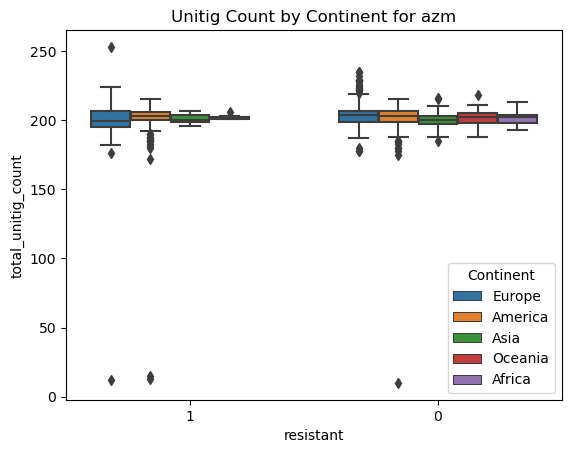

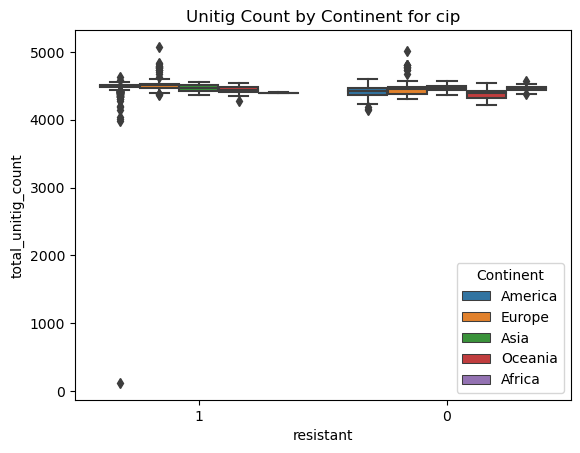

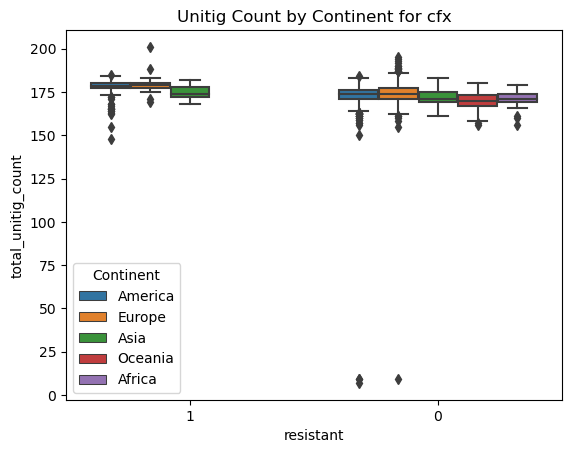

In [12]:
for name, data in data_all.items():
    g = sns.boxplot(x='resistant',y='total_unitig_count',data=data,hue='Continent', order=[1,0])
    g.set_title(f"Unitig Count by Continent for {name}")
    plt.show()

Continent has very little effect on the total number of unitigs.

Additionally, I explored the unitigs not present in each continent to see if selecting specific continents could help reduce dimensionality.

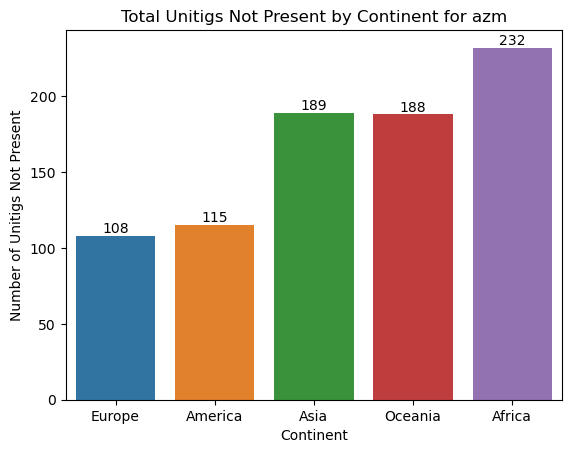

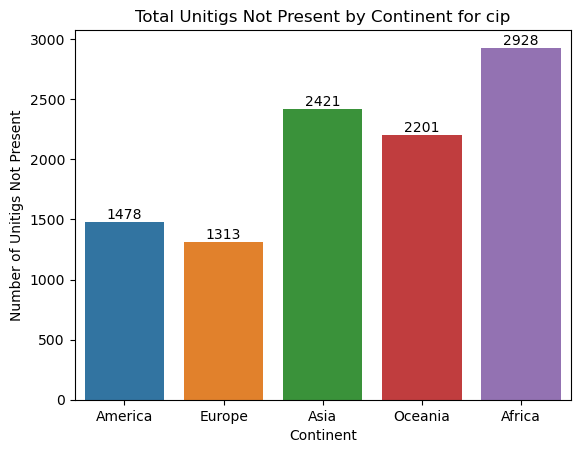

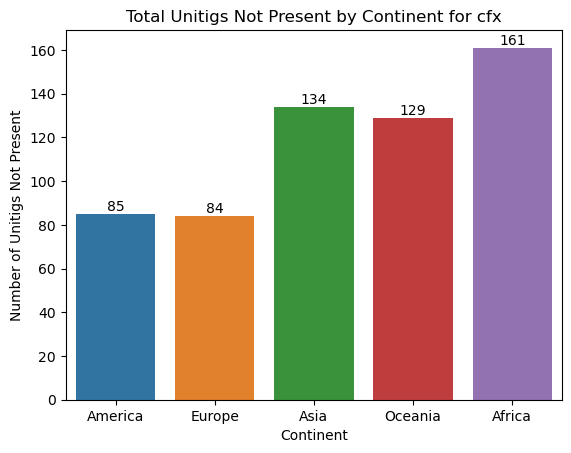

In [13]:
for name,data in data_all.items():
    continent_unused_unitigs = []
    continent_names = data['Continent'].unique()
    continent_names = continent_names[~pd.isnull(continent_names)]
    for continent in continent_names:
        samples_per_unitig = data[data['Continent']==continent][data.columns[6:-2]].sum(axis=0)
        unused_unitig_count = samples_per_unitig[samples_per_unitig == 0].count()
        continent_unused_unitigs.append(unused_unitig_count)
    g = sns.barplot(x=continent_names,y=continent_unused_unitigs)
    g.bar_label(container=g.containers[0], labels=continent_unused_unitigs)
    g.set(xlabel='Continent', ylabel='Number of Unitigs Not Present')
    plt.title(f'Total Unitigs Not Present by Continent for {name}')
    plt.show()

Reducing the number of continents has the potential to reduce dimensionality. However, it does also potentially limit the power of the model as it would then become regionally restricted.

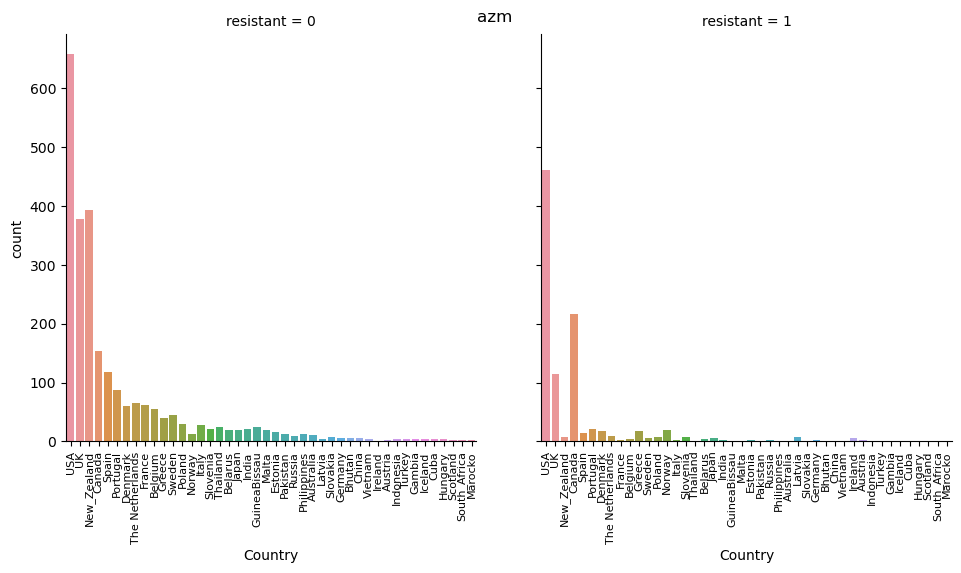

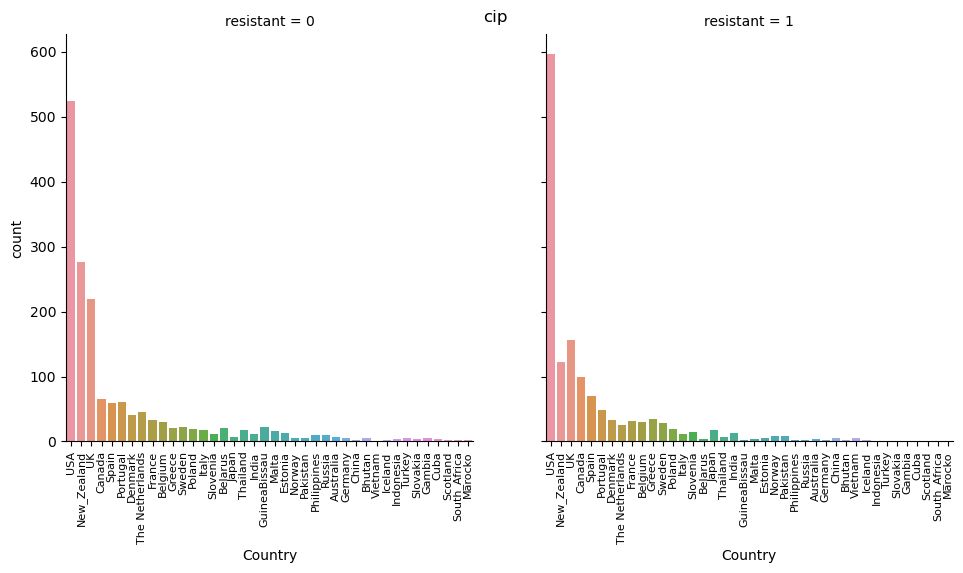

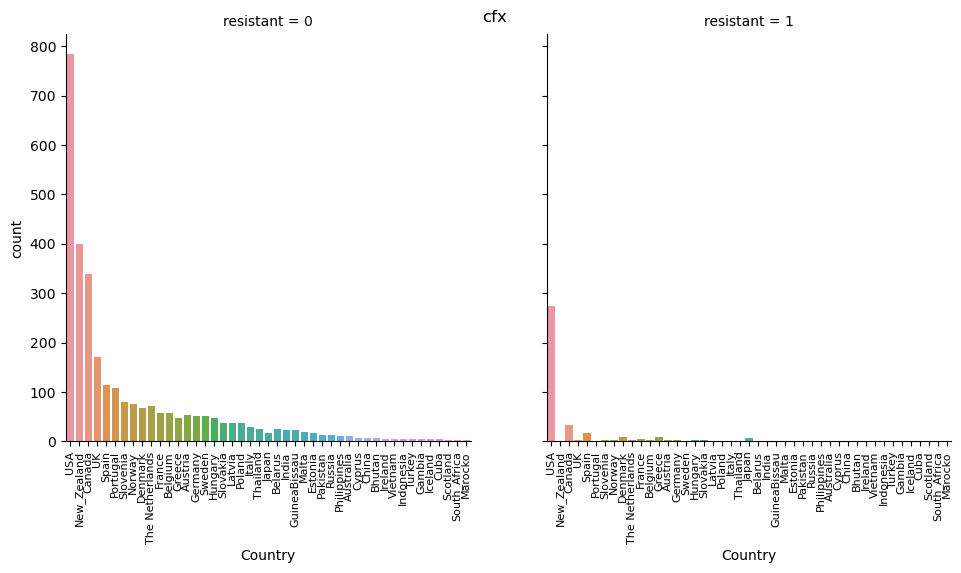

In [14]:
for name,data in data_all.items():
    recurring_countries = data.groupby('Country').filter(lambda x: len(x) > 2)
    g = sns.catplot(kind='count', x='Country', data=recurring_countries,
                order=recurring_countries['Country'].value_counts().index, col='resistant')
    g.set_xticklabels(fontsize=8,rotation=90)
    g.fig.suptitle(f"{name}")
    plt.show()

## 2.6 Unitig Correlation with Resistance

To further look into the many individual unitigs, I wanted to compare various aspects including:
<ul>
    <li>their presence in resistant samples</li>
    <li>their presence in sensitive samples)</li>
    <li>the chi-squared statistic with resistance</li>
    <li>the related p-value for significance</li>
</ul>

For the chi-square test, my null hypothesis is that each unitig and resistance are independent that are not correlated, and my alternate hypothesis is that the unitig is correlated with resistance.
I created a dataframe in order to analyze all of the above.

In [15]:
def unitig_analysis(df,extra_cols=1):
    """create a dataframe including unitig, total in resistant samples, total in sensitive samples
    chi-squared value, and p value based on resistance."""
    # Initialize lists 
    unitig = []
    total_in_R = []
    total_in_S = []
    total_in_all = []
    chi2_val = []
    p_val = []

    # iterate over columns and append lists for each unitig
    for col in df.columns[6:-1*extra_cols]:
        unitig.append(col)
        r_total = df.loc[df['resistant']==1,col].sum()
        s_total = df.loc[df['resistant']==0,col].sum()
        all_total = df[col].sum()

        total_in_R.append(r_total)
        total_in_S.append(s_total)
        total_in_all.append(all_total)

        data_crosstab = pd.crosstab(df['resistant'],df[col],
                                    margins=True,margins_name='Total')
        stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
        chi2_val.append(stat)
        p_val.append(p)
        
    # create dictionary
    unitig_analysis_dict = {
        'unitig': unitig,
        'total_in_R': total_in_R,
        'total_in_S': total_in_S,
        'total_in_all': total_in_all,
        'chi2_val': chi2_val,
        'p_val': p_val
    }

    # convert to dataframe
    unitig_analysis = pd.DataFrame(unitig_analysis_dict)
    return unitig_analysis

### 2.5.1 Unitigs Correlated with azm Resistance

In [16]:
azm_unitig_analysis = unitig_analysis(azm_data)

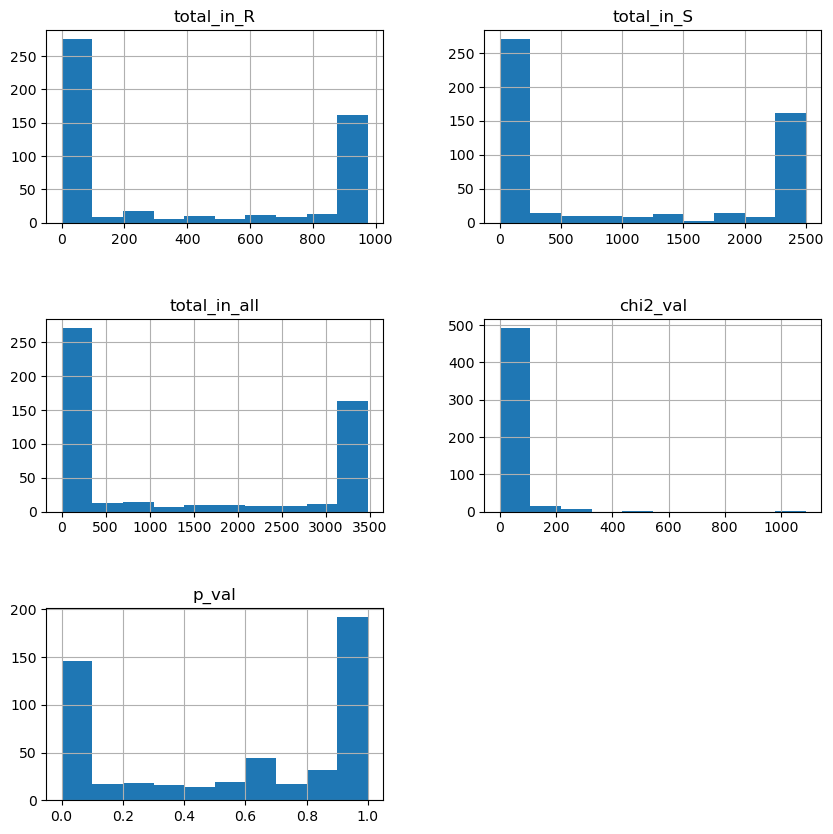

In [17]:
# plot histograms for all variables
azm_unitig_analysis.hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.5);

The distributions for totals in resistant and sensitive samples are almost identical with peaks near zero and the maximum number of samples in each group. This is expected as the majority of unitigs are not connected to resistance and the shape mirrors the distribution for all samples. There appears to be one outlier chi-squared value, which is of interest as it could be a great predictor of resistance. The chi-square and p values show that there may be a fair number of potentially significant unitigs correlated to resistance.

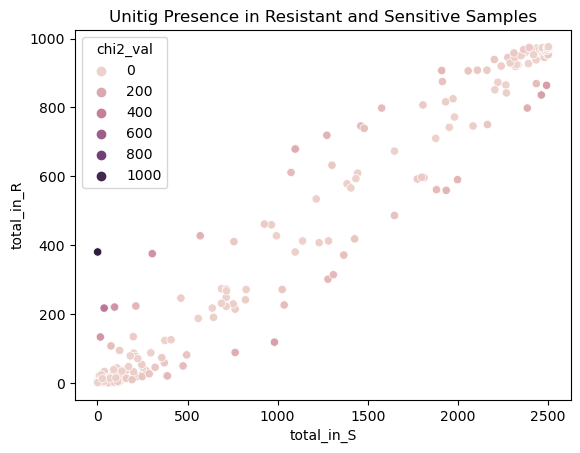

In [18]:
# plot total_in_S vs total_in_R with hue as chi2_val
g = sns.scatterplot(x='total_in_S',y='total_in_R',data=azm_unitig_analysis, hue='chi2_val')
g.set_title('Unitig Presence in Resistant and Sensitive Samples');

There is a linear relationship between the total azm sensitive samples with a unitig with the total resistant samples with that unitig. Our focus is on the points deviating from this relationship. We can see our outlier chi-squared value that is in close to 400 resistant samples and almost no sensitive samples.

In [19]:
# Sort by chi-squared value
azm_unitig_analysis.sort_values('chi2_val',ascending=False).head(10)

,unitig,total_in_R,total_in_S,total_in_all,chi2_val,p_val
150,GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGC...,380,1,381,1088.869848,1.957310e-234
345,CATCTGCCTGGCAAACGCTTCCCCGTCGCCCTCGAA,217,37,254,446.760349,2.178750e-95
347,TTTCAGACGGCATCTGCCTGGCAAACGCTTCCC,375,304,679,308.443331,1.634308e-65
173,AAAGGCGTTTGCGTTGCGAGGAGTTCATATC,220,95,315,299.490111,1.395699e-63
346,AACATCAGGAAAACGGCACATTCCACGCCGT,133,16,149,288.816382,2.798392e-61
316,TCATCTCGTATGCCGTCTTCTGCTTGAAAAA,864,2492,3356,254.465907,7.102805e-54
240,GCCGTCTTATTATAGGGAAGGCGTTCCCCGGAGCAC,118,982,1100,239.481360,1.199878e-50
315,TACAAGCCTTGTGGCTTGTTGCCCTCTCTCTAGC,836,2463,3299,235.108006,1.049207e-49
352,CAAATCAATACGCTGACTAAAGGTTGCAATTTA,679,1097,1776,185.937267,3.955654e-39
351,CTTCCCCAAAAATATCGACACACTCGAAACTCTCCTGACCGACAAC...,680,1100,1780,185.704337,4.438743e-39


In [20]:
for i in range(10):
    unitig = azm_unitig_analysis.sort_values('chi2_val',ascending=False).iloc[i,0]
    print(f"Rank {i+1}: {unitig}")

Rank 1: GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGCGTTGGAAGTTTGACG
Rank 2: CATCTGCCTGGCAAACGCTTCCCCGTCGCCCTCGAA
Rank 3: TTTCAGACGGCATCTGCCTGGCAAACGCTTCCC
Rank 4: AAAGGCGTTTGCGTTGCGAGGAGTTCATATC
Rank 5: AACATCAGGAAAACGGCACATTCCACGCCGT
Rank 6: TCATCTCGTATGCCGTCTTCTGCTTGAAAAA
Rank 7: GCCGTCTTATTATAGGGAAGGCGTTCCCCGGAGCAC
Rank 8: TACAAGCCTTGTGGCTTGTTGCCCTCTCTCTAGC
Rank 9: CAAATCAATACGCTGACTAAAGGTTGCAATTTA
Rank 10: CTTCCCCAAAAATATCGACACACTCGAAACTCTCCTGACCGACAACCGCATCTGGAAACAG


These are our top ten most correlated unitigs to azm resistance. Our outlier is GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGCGTTGGAAGTTTGACG which is present in 380 resistant samples and only 1 sensitive one. Additionally, we can see that there are many unitigs with extremely high chi-squared values and low p values, meaning they are significantly correlated with resistance.

Total unitigs with p < 0.01: 122
Total unitigs with p < 0.001: 103
Total unitigs with p < 0.0001: 87


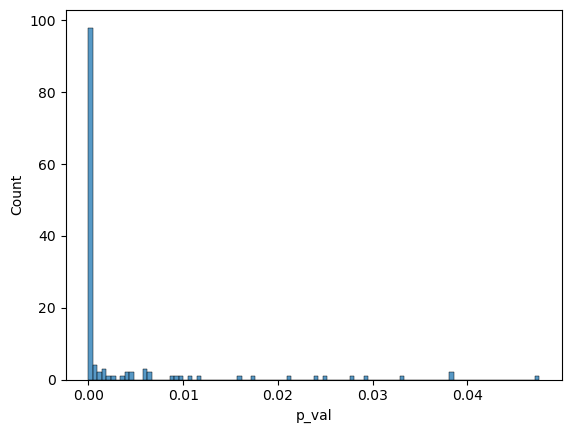

In [21]:
# plot histogram for p values less than 0.05
sns.histplot(x='p_val',data = azm_unitig_analysis[azm_unitig_analysis['p_val'] < 0.05].sort_values('p_val'),bins=100);
for p in [0.01,0.001,0.0001]:
    print(f"Total unitigs with p < {p}: {len(azm_unitig_analysis[azm_unitig_analysis['p_val'] < p])}")

There are 122 unitigs with p values less than 0.01, and the majority of those have substantially statistically significant correlations with resistance.

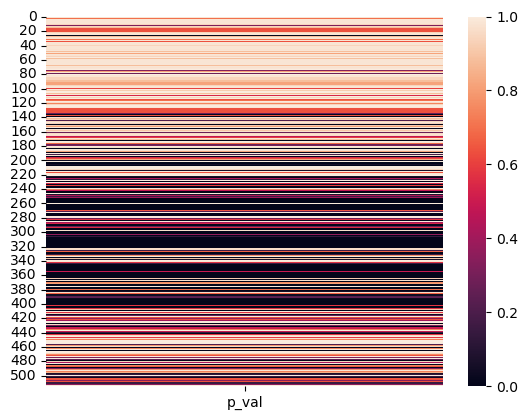

In [22]:
# Create heatmap of p_values
sns.heatmap(azm_unitig_analysis[['p_val']]);

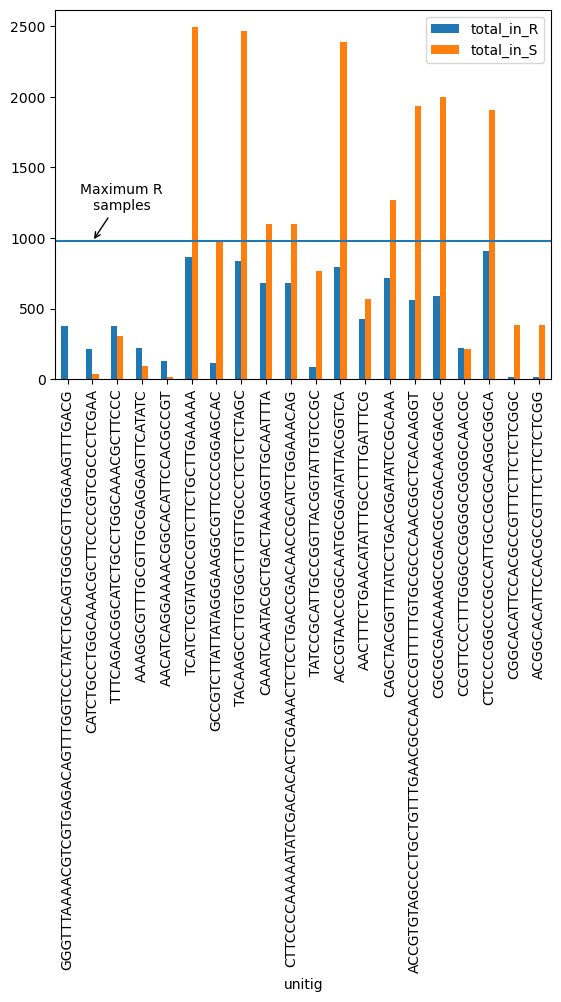

In [23]:
# plot total_in_R and total_in_S for unitigs with highest chi-squared values
azm_unitig_analysis.sort_values('chi2_val',ascending=False).head(20).plot(
    x='unitig',
    y=['total_in_R','total_in_S'],
    kind='bar')
plt.axhline(976)
plt.annotate('Maximum R\n   samples',xy=(1,976),xytext=(0.5,1200),arrowprops={'arrowstyle':'->'});

While there are many unitigs with high chi-squared values, many of them are still present in the majority of sensitive samples.

### 2.5.2 Unitigs Correlated with cip Resistance

In [24]:
cip_unitig_analysis = unitig_analysis(cip_data)

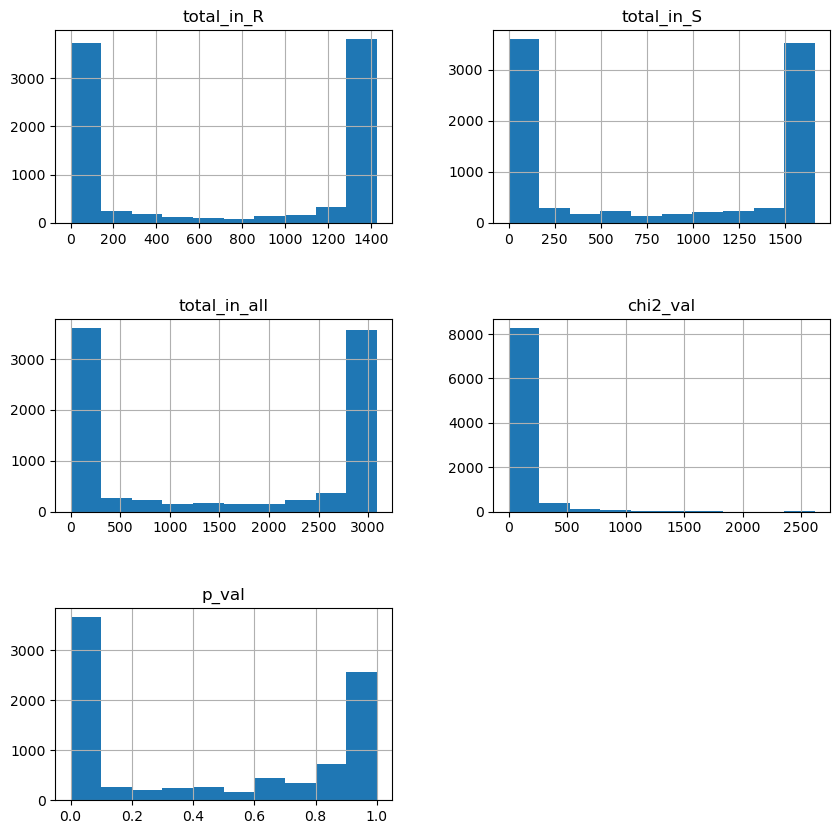

In [25]:
# plot histograms for all variables
cip_unitig_analysis.hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.5);

Here we see similar distributions as azm, but far more unitigs as there are 8873 unitigs in the cip data.

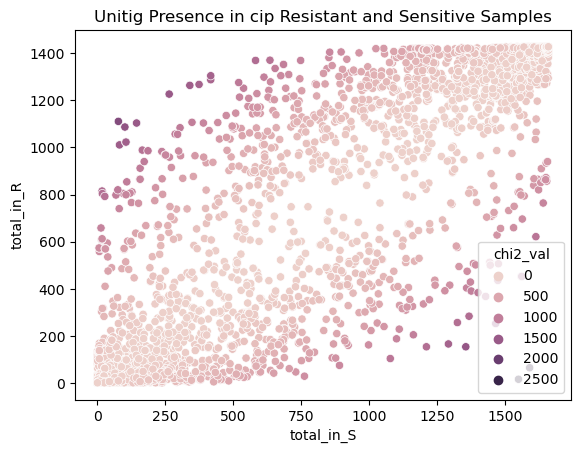

In [26]:
g = sns.scatterplot(x='total_in_S',y='total_in_R',data=cip_unitig_analysis, hue='chi2_val')
g.set_title('Unitig Presence in cip Resistant and Sensitive Samples');

In the cip data, there appears to be more variance between the totals in resistant and sensitive samples. There are more unitigs with high chi-squared values, and far higher values than in azm as well. This may be because cip resistance is more common than azm resistance and therefore genes for resistances have been more highly shared and are more homogenous than for azm or cpx.

In [27]:
cip_unitig_analysis.sort_values('chi2_val',ascending=False).head(10)

,unitig,total_in_R,total_in_S,total_in_all,chi2_val,p_val
5502,GCGCAGCCGCAAATCTTGTTTTCCCATTCCGCC,15,1550,1565,2617.699879,0.000000e+00
4717,GTGCGACAGCAAAGTCCAAACCAGCGTCCCCGCC,64,1591,1655,2576.301043,0.000000e+00
4000,AAATTGCGGATCGATGCGCGAAGGGTCGAATGC,1111,77,1188,1735.886821,0.000000e+00
3992,CTTGGCACACAGTACCGAACCGGCGGCAATACCGATG,1087,101,1188,1590.697462,0.000000e+00
4719,GACTACATCAGCGGCAACATCTTGTTTATGCTGACCG,252,1466,1718,1553.077992,0.000000e+00
4679,CGCACATTTTGGCTTTATCTTTTGGGCGCGCTGACTGCCCGTTTCG...,153,1356,1509,1547.468974,0.000000e+00
4019,TATACTGCCGTTCAAGTTACCTTTGGTCAGAAAAAA,1227,264,1491,1507.247630,0.000000e+00
3996,GTTGTGCCGAATATTGCACCGATGGAAAGGGGGAGGATGTT,1104,144,1248,1501.716541,0.000000e+00
3906,CAGGCGGAAATATAGTGGATTAAATTTAAAC,1011,81,1092,1459.314890,0.000000e+00
4003,TGCCGCAGCAGAACCTAAAGCCGAGGAAAAAGCCGC,1264,340,1604,1423.379396,5.888325e-307


In [28]:
for i in range(10):
    unitig = cip_unitig_analysis.sort_values('chi2_val',ascending=False).iloc[i,0]
    print(f"Rank {i+1}: {unitig}")

Rank 1: GCGCAGCCGCAAATCTTGTTTTCCCATTCCGCC
Rank 2: GTGCGACAGCAAAGTCCAAACCAGCGTCCCCGCC
Rank 3: AAATTGCGGATCGATGCGCGAAGGGTCGAATGC
Rank 4: CTTGGCACACAGTACCGAACCGGCGGCAATACCGATG
Rank 5: GACTACATCAGCGGCAACATCTTGTTTATGCTGACCG
Rank 6: CGCACATTTTGGCTTTATCTTTTGGGCGCGCTGACTGCCCGTTTCGGCATCGGCGTG
Rank 7: TATACTGCCGTTCAAGTTACCTTTGGTCAGAAAAAA
Rank 8: GTTGTGCCGAATATTGCACCGATGGAAAGGGGGAGGATGTT
Rank 9: CAGGCGGAAATATAGTGGATTAAATTTAAAC
Rank 10: TGCCGCAGCAGAACCTAAAGCCGAGGAAAAAGCCGC


These are our top ten most correlated unitigs to cip resistance. The top 9 all have a calculated p value of 0.

Total unitigs with p < 0.01: 3180
Total unitigs with p < 0.0001: 2639
Total unitigs with p < 1.0000000000000002e-06: 2343
Total unitigs with p < 1e-08: 2063
Total unitigs with p < 1.0000000000000002e-10: 1877


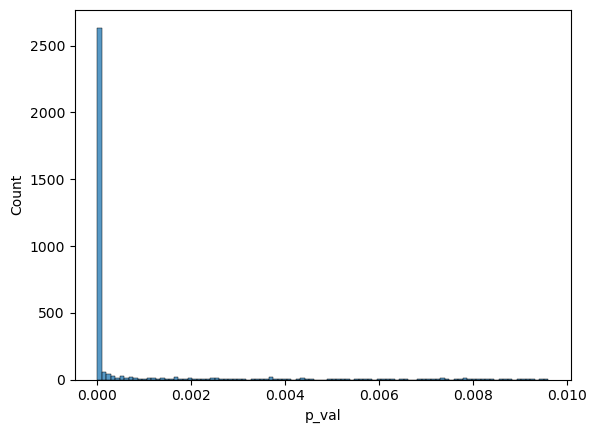

In [29]:
sns.histplot(x='p_val',data = cip_unitig_analysis[cip_unitig_analysis['p_val'] < 0.01].sort_values('p_val'),bins=100);
for i in range(1,6):
    p = 0.01**i
    print(f"Total unitigs with p < {p}: {len(cip_unitig_analysis[cip_unitig_analysis['p_val'] < p])}")

There are 3180 unitigs with a p value less than 0.01 with the majority being far below that.

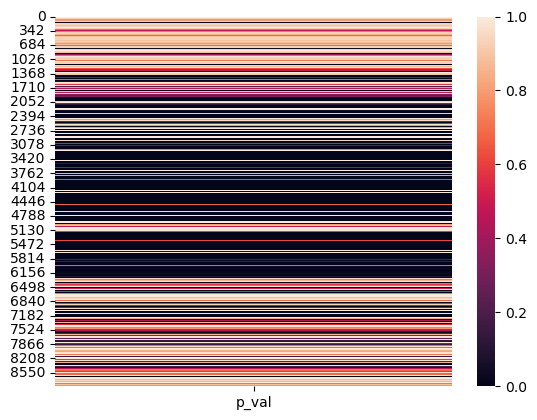

In [30]:
sns.heatmap(cip_unitig_analysis[['p_val']]);

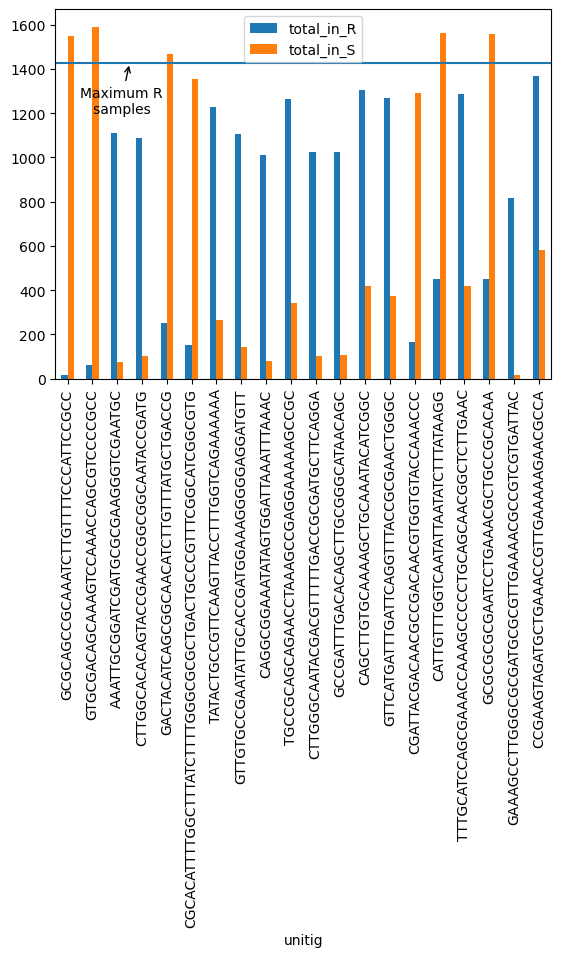

In [31]:
# plot total_in_R and total_in_S for unitigs with highest chi-squared values
cip_unitig_analysis.sort_values('chi2_val',ascending=False).head(20).plot(
    x='unitig',
    y=['total_in_R','total_in_S'],
    kind='bar')
plt.axhline(1428)
plt.annotate('Maximum R\n   samples',xy=(2.5,1428),xytext=(0.5,1200),arrowprops={'arrowstyle':'->'});

Because cip resistance is more common than azm resistance, here we see larger differences between unitigs in R versus S.

### 2.5.2 Unitigs Correlated with cfx Resistance

In [32]:
cfx_unitig_analysis = unitig_analysis(cfx_data)

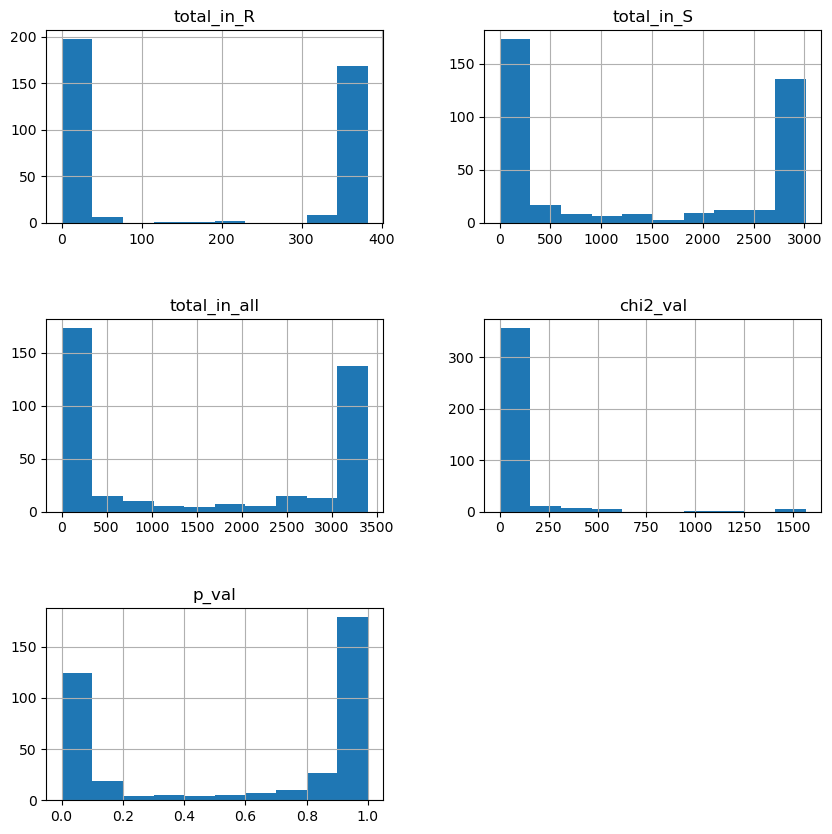

In [33]:
# plot histograms for all variables
cfx_unitig_analysis.hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.5);

Here we see extremely similar distributions as azm. Fewer unitigs have lower p values, which reflects how cfx has the least resistance, so there would be fewer sequences related to resistance.

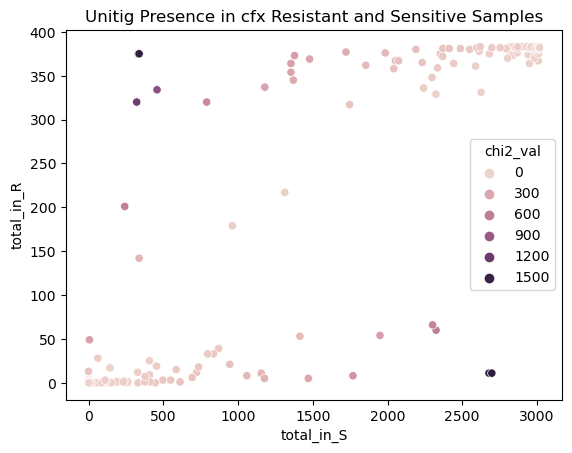

In [34]:
g = sns.scatterplot(x='total_in_S',y='total_in_R',data=cfx_unitig_analysis, hue='chi2_val')
g.set_title('Unitig Presence in cfx Resistant and Sensitive Samples');

In the cfx data, there seem to be clusters of unitigs not present in resistant samples or present in most of the resistant strains. This is most likely again due to the lower number of resistant strains.

In [35]:
cfx_unitig_analysis.sort_values('chi2_val',ascending=False).head(10)

,unitig,total_in_R,total_in_S,total_in_all,chi2_val,p_val
255,AATATCGGTAAATCCGATGACGTGTGCAAAAAGGCTGCCCATCGGG...,11,2698,2709,1565.261020,0.000000e+00
190,AAACGACTTGCCTTTCTGTTCGAGTTTGTTCCTCAAAACATC,375,334,709,1554.460646,0.000000e+00
191,GTAATGGCGTTTTAATTCTTTTTCAAATACAAAGTT,375,338,713,1543.320493,0.000000e+00
254,TTCGGCAACCTTGGGATCGAGCTGCCGCTTAATCCAGATAAACGAC...,11,2679,2690,1512.064543,0.000000e+00
186,CAAACAACTTCTATTACGCCAAAAGTCAGGCGATGCTCTACACC,320,322,642,1179.739687,3.928925e-254
193,GGATTCCGGCAAAGTGGATGCAACCGATACATTCAATACCCTGCCT...,334,458,792,987.851132,1.532470e-212
256,AAAACGCCGTCGTGCGTCAGTGCGGTATAGGC,60,2325,2385,609.606200,1.291628e-130
151,TGCTAAGAAACAAGGACAATGGCAACAGGATAGA,201,242,443,593.541737,3.871967e-127
257,TAAAGGACAAAGACAGGAGGCGCGAATATACTTA,66,2302,2368,558.912065,1.206846e-119
192,GGGCGATTTTCGTTTTCTTGGCGGCGTATTCGCCGG,320,790,1110,509.381243,6.265896e-109


In [36]:
for i in range(10):
    row = cfx_unitig_analysis.sort_values('chi2_val',ascending=False).iloc[i,:]
    unitig = row[0]
    R_total = row[1]
    S_total =row[2]
    print(f"Rank {i+1}: {unitig}\n     total in R: {R_total}     total in S: {S_total}")

Rank 1: AATATCGGTAAATCCGATGACGTGTGCAAAAAGGCTGCCCATCGGGTAATGGCGTTTTAATTCTT
     total in R: 11     total in S: 2698
Rank 2: AAACGACTTGCCTTTCTGTTCGAGTTTGTTCCTCAAAACATC
     total in R: 375     total in S: 334
Rank 3: GTAATGGCGTTTTAATTCTTTTTCAAATACAAAGTT
     total in R: 375     total in S: 338
Rank 4: TTCGGCAACCTTGGGATCGAGCTGCCGCTTAATCCAGATAAACGACTTGCCTTTCTGTTCGAG
     total in R: 11     total in S: 2679
Rank 5: CAAACAACTTCTATTACGCCAAAAGTCAGGCGATGCTCTACACC
     total in R: 320     total in S: 322
Rank 6: GGATTCCGGCAAAGTGGATGCAACCGATACATTCAATACCCTGCCTTACAAAATCGGT
     total in R: 334     total in S: 458
Rank 7: AAAACGCCGTCGTGCGTCAGTGCGGTATAGGC
     total in R: 60     total in S: 2325
Rank 8: TGCTAAGAAACAAGGACAATGGCAACAGGATAGA
     total in R: 201     total in S: 242
Rank 9: TAAAGGACAAAGACAGGAGGCGCGAATATACTTA
     total in R: 66     total in S: 2302
Rank 10: GGGCGATTTTCGTTTTCTTGGCGGCGTATTCGCCGG
     total in R: 320     total in S: 790


These are our top ten most correlated unitigs to cip resistance. The top 4 all have a calculated p value of 0.

Total unitigs with p < 0.01: 106
Total unitigs with p < 0.0001: 87
Total unitigs with p < 1.0000000000000002e-06: 76
Total unitigs with p < 1e-08: 65
Total unitigs with p < 1.0000000000000002e-10: 61


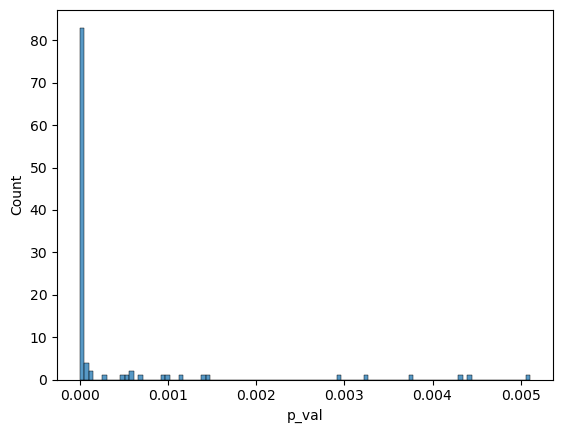

In [37]:
sns.histplot(x='p_val',data = cfx_unitig_analysis[cfx_unitig_analysis['p_val'] < 0.01].sort_values('p_val'),bins=100);
for i in range(1,6):
    p = 0.01**i
    print(f"Total unitigs with p < {p}: {len(cfx_unitig_analysis[cfx_unitig_analysis['p_val'] < p])}")

There are 106 unitigs with a p value less than 0.01, giving similar results to azm.

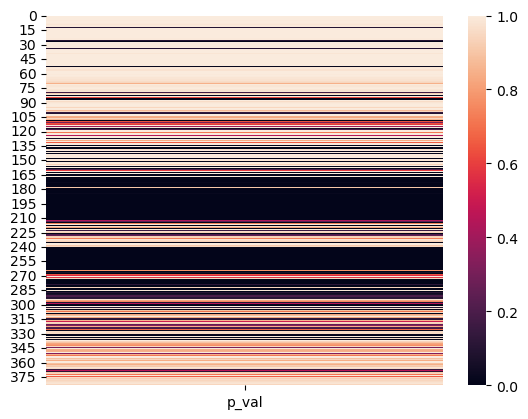

In [38]:
sns.heatmap(cfx_unitig_analysis[['p_val']]);

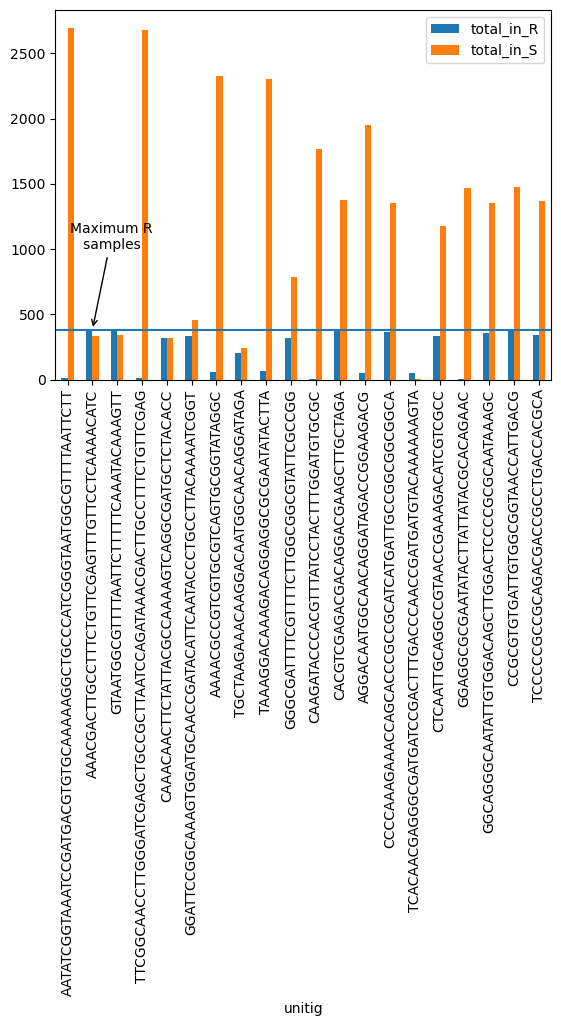

In [39]:
# plot total_in_R and total_in_S for unitigs with highest chi-squared values
cfx_unitig_analysis.sort_values('chi2_val',ascending=False).head(20).plot(
    x='unitig',
    y=['total_in_R','total_in_S'],
    kind='bar')
plt.axhline(383)
plt.annotate('Maximum R\n   samples',xy=(1,383),xytext=(0.1,1000),arrowprops={'arrowstyle':'->'});

A few unitigs are overwhemingly present in sensitive strains, such as AATATCGGTAAATCCGATGACGTGTGCAAAAAGGCTGCCCATCGGGTAATGGCGTTTTAATTCTT and TTCGGCAACCTTGGGATCGAGCTGCCGCTTAATCCAGATAAACGACTTGCCTTTCTGTTCGAG. There are also many unitigs that are present in almost all resistant strains but proportionally fewer sensitive ones, such as AAACGACTTGCCTTTCTGTTCGAGTTTGTTCCTCAAAACATC and GTAATGGCGTTTTAATTCTTTTTCAAATACAAAGTT.

## 2.7 PCA

The unitig data intended for the model is entirely binary. I was curious what results PCA would yield and how they would compare to the chi-squared results above. First I defined a function to print perform the PCA, print various plots, and return a dataframe with the component values for the unitigs combined with the previous unitig analysis.

In [40]:
def pca(data,name):
    data_pca = data.iloc[:,6:-2]
    columns = data_pca.columns
    pca = PCA().fit(data_pca)
    
    plt.plot(pca.explained_variance_ratio_.cumsum())
    plt.xlabel('Component #')
    plt.ylabel('Cumulative ratio variance')
    plt.title(f'Cumulative ratio variance explained by PCA components for {name} unitigs')
    plt.show()
    
    pca_x = pca.transform(data_pca)
    pca_df = pd.DataFrame({"PC1": pca_x[:,0], "PC2": pca_x[:,1]})
    pca_df = pd.concat([pca_df, data['resistant']], axis = 1)
    sns.scatterplot(x='PC1',y='PC2',data=pca_df,hue='resistant')
    pc_var = 100 * pca.explained_variance_ratio_.cumsum()[1]
    plt.xlabel('First component')
    plt.ylabel('Second component')
    plt.title(f'{name} unitig PCA, {pc_var:.1f}% variance explained')
    plt.show()
    
    df = pd.DataFrame(pca.components_, columns=columns).iloc[:2,:].T
    df = df.rename(columns={0:'PC1',1:'PC2'})
    df = pd.concat([df,unitig_analyses[name]],axis=1)
    sns.scatterplot(x='PC1',y='PC2',data = df,hue='chi2_val')
    plt.title(f'PCA component unitig association for {name}')
    plt.show()
    for component in ['PC1','PC2']:
        g = sns.scatterplot(x='total_in_S',y='total_in_R',data=df, hue=component, palette='RdBu')
        g.set_title(f'{component} unitig presence in {name} resistant and sensitive samples')
        plt.show()
    
    pca_component_analysis = df
    return pca_component_analysis

In [41]:
unitig_analyses = {
    'azm': azm_unitig_analysis.set_index('unitig'),
    'cip': cip_unitig_analysis.set_index('unitig'),
    'cfx': cfx_unitig_analysis.set_index('unitig'),
}

### 2.7.1 azm PCA

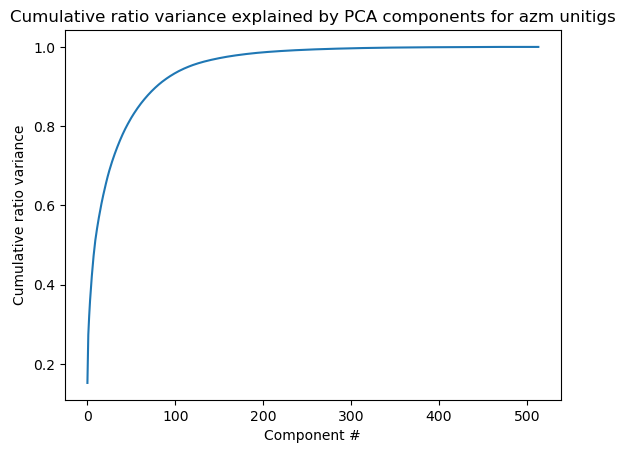

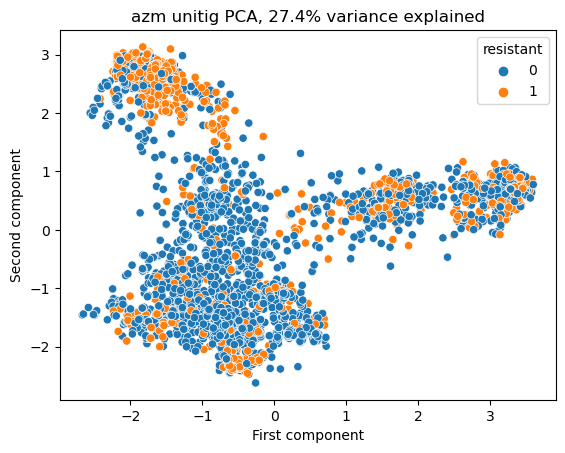

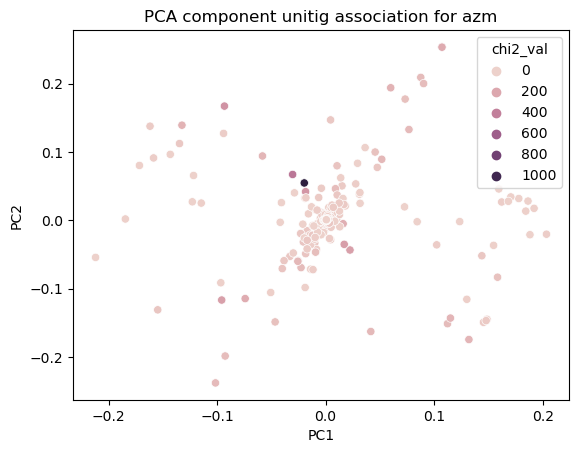

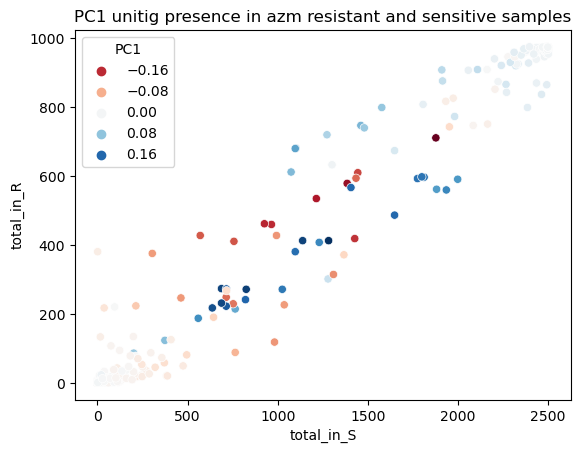

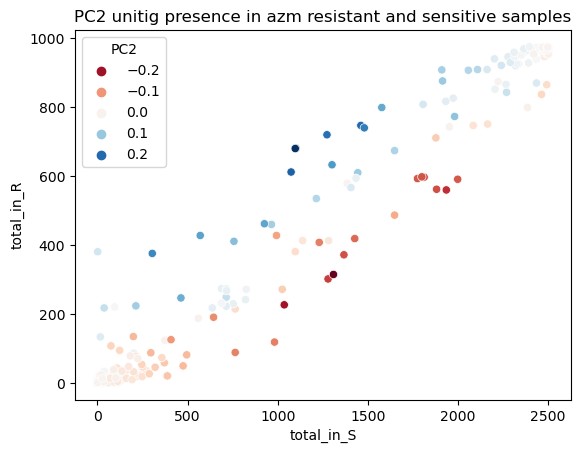

In [42]:
azm_pca_components = pca(azm_data,'azm')

PCA does not seem effective for this data, as the first two components only explain 27.4% of the variance, but this is not surprising given the number of features. One interesting aspect is that PC2 separated more by resistance than PC1.

To narrow down the unitigs, I wanted to see the unitigs more associated with each PC.

In [43]:
azm_pc_assoc = pd.concat([azm_pca_components[azm_pca_components['PC1']>0.1],
           azm_pca_components[azm_pca_components['PC1']<-0.1],
           azm_pca_components[azm_pca_components['PC2']>0.1],
           azm_pca_components[azm_pca_components['PC2']<-0.1]])
print(azm_pc_assoc.index.values)

['CATCACCTTAGGGAATCGTTCCCTTTGGGCC' 'AAGTCGGGAAATGCCCTTATCCGGTATGCGACCA'
 'GGGAACGCCTTCCCTATAATAAGACGGCAATACGAATATATG'
 'TTGCCGTCTTATTATAGGGAAGGCGTTCCCC' 'ATGGCGGTCGTTTCTTGCTGCCAGTTGCTAAG'
 'GTTCAGATAATAGGCCATGGCGGTCGTTTCTTGCTGCCAGTTGC'
 'CACTGTAGGATTGGACATATCCAAGCTGACA' 'CCCGCGTGTTTGCGCCTTGTTTTCCCGCCGGCA'
 'CATTTCCGCTTCAGACGGCATCCGATATGAAC' 'GACGGTCAGGGCGGCAAGCAGCAGCAGGGGGC'
 'AAACCTGCCGACCCTTCACAGCATTCGCGCCCGAA'
 'GCGAATGCCCGCTCGCTGATGACCGGCCGCATTA' 'AAAAGAGCCAAAAAGGTATCACCCCCCCCCC'
 'CCTGCGGTACGGCGGGAAACAATGCCGCCCG' 'TAATCAAAACCTCGTCTATACGACAGAAGACC'
 'ATGCTCTGCCGTTTGGCGGGGTCGTCTGGGG' 'GCATGGGCAAGCAGGTCGAGATATTCGCCGCGCA'
 'TGCTATTTCAGTCAATCGTACCGATTCCGGC' 'CCCAAAGGGAACGATTCCCTAAGGTGATGGA'
 'ACCGTGTAGCCCTGCTGTTTGAACGCCAACCCGTTTTTGTGCGCCCAACGGCTCACAAGGT'
 'CGCGCGACAAAGCCGACGCCGACAACGACGC'
 'CTTCCCCAAAAATATCGACACACTCGAAACTCTCCTGACCGACAACCGCATCTGGAAACAG'
 'CAAATCAATACGCTGACTAAAGGTTGCAATTTA' 'GACCCGCCAACCCGACCGCCGTGATTCCCGC'
 'CCTGACCCTGGACGCCGGCTACCGCTACCAC'
 'ACAGATTACCTGCCGACTGCTGCTTCA

### 2.7.2 cip PCA

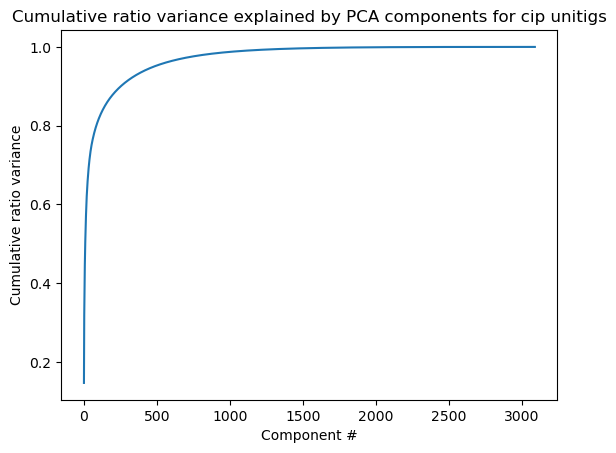

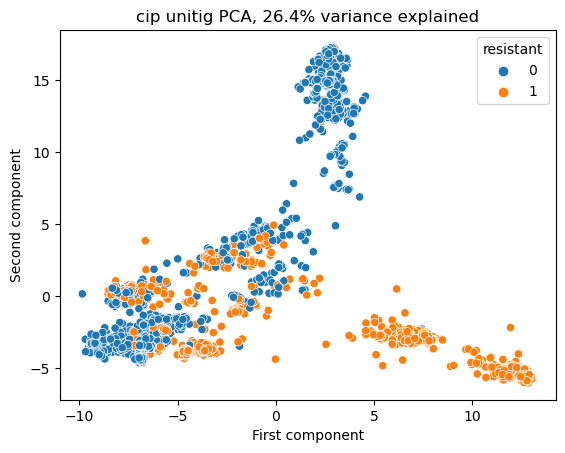

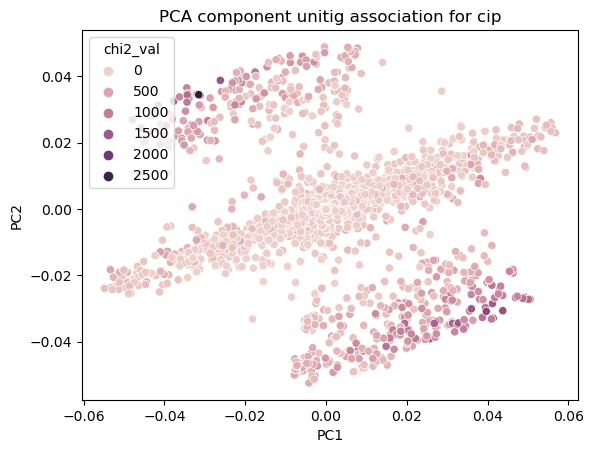

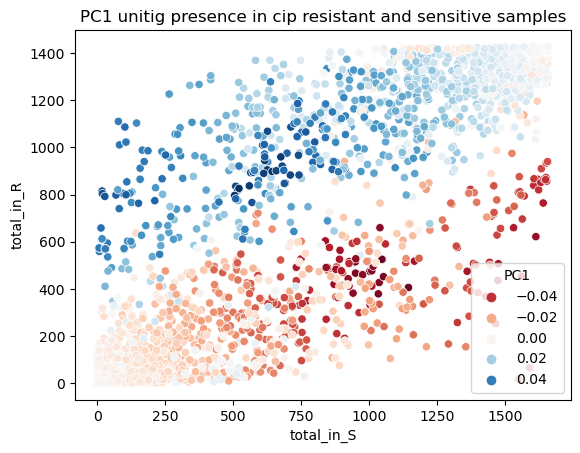

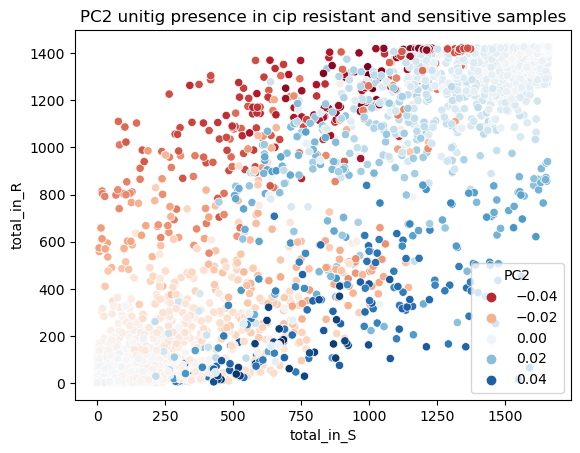

In [44]:
cip_pca_components = pca(cip_data,'cip')

cip's PCA yields quite different results. Here we see that both PC1 and PC2 seem to predict resistance, PC1 having high resistance for values larger than 5 and PC2 having high sensitivity for values larger than 5. The component association's for the unitigs shows the unitigs grouped into three clusters, stratified by PC2 more than PC1. Unitigs with more extreme association with PC2 also seem to be more distinct between the R and S samples.

In [45]:
cip_pc_assoc = pd.concat([cip_pca_components[cip_pca_components['PC1']>0.02],
           cip_pca_components[cip_pca_components['PC1']<-0.02],
           cip_pca_components[cip_pca_components['PC2']>0.02],
           cip_pca_components[cip_pca_components['PC2']<-0.02]])
print(cip_pc_assoc.index.values)

['ACGGGCCGCGCCCATGGTCTTCACCCGCCGCC' 'GATTCAAGCCTAAAGTAGAAAAAGTAGTTAC'
 'GCAAATGCTTGGTCTTTGAATGCGTCGTCGTCAAAAG' ...
 'TTTGCATTGTCTGCCTGCACCATGATTCCCCAATACGAGCAG'
 'GAAGTCGTATTCGCGTTGCGCCATAAACGATACGGC' 'CGACCGCATCGGAATCCTGCTTGACGGCGGCG']


### 2.7.3 cfx PCA

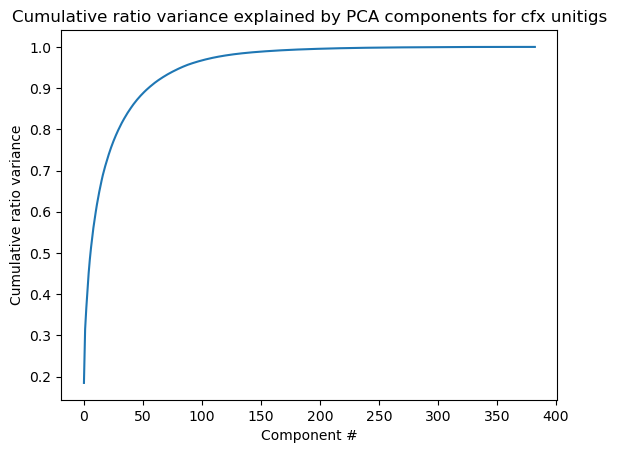

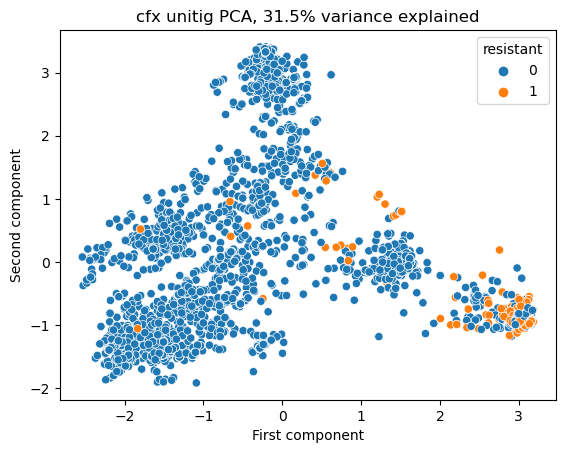

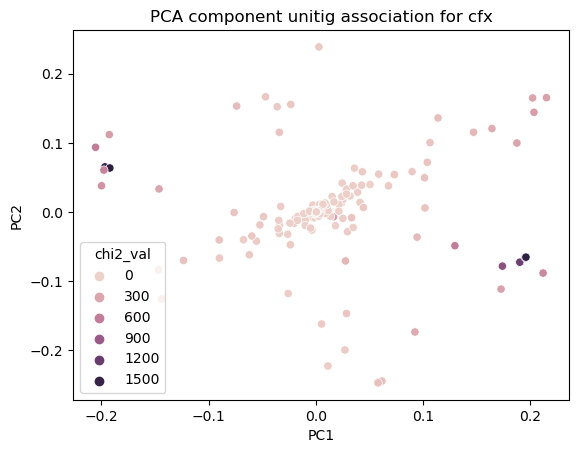

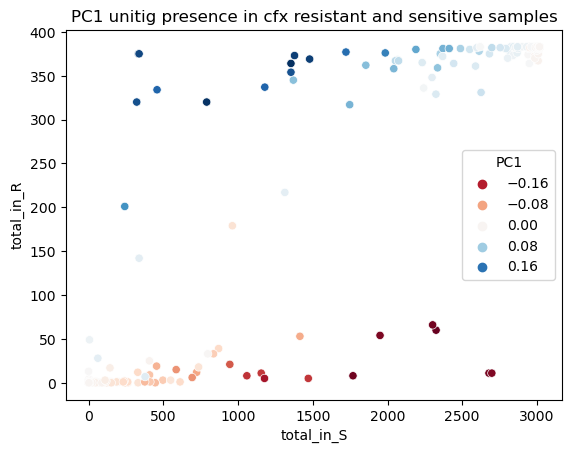

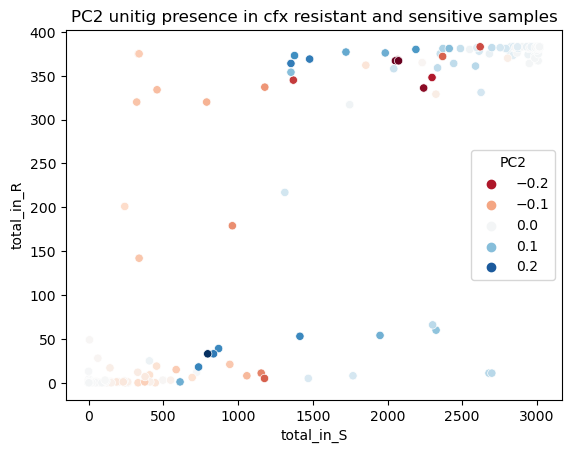

In [46]:
cfx_pca_components = pca(cfx_data,'cfx')

The cfx PCA shows the majority of the resistant samples around 2.6 on PC1. However, that cluster also includes many sensitive samples. Unitigs more associated with PC1 also tend to be more exclusive to either R or S samples.

In [47]:
cfx_pc_assoc = pd.concat([cfx_pca_components[cfx_pca_components['PC1']>0.1],
           cfx_pca_components[cfx_pca_components['PC1']<-0.1],
           cfx_pca_components[cfx_pca_components['PC2']>0.1],
           cfx_pca_components[cfx_pca_components['PC2']<-0.1]])
print(cfx_pc_assoc.index.values)

['TGCTAAGAAACAAGGACAATGGCAACAGGATAGA'
 'CAAACAACTTCTATTACGCCAAAAGTCAGGCGATGCTCTACACC'
 'AAACGACTTGCCTTTCTGTTCGAGTTTGTTCCTCAAAACATC'
 'GTAATGGCGTTTTAATTCTTTTTCAAATACAAAGTT'
 'GGGCGATTTTCGTTTTCTTGGCGGCGTATTCGCCGG'
 'GGATTCCGGCAAAGTGGATGCAACCGATACATTCAATACCCTGCCTTACAAAATCGGT'
 'CTCAATTGCAGGCCGTAACCGAAAGACATCGTCGCC'
 'GTTTATCCTACTTTGGATGTGCGCGGCATTATGCAAAAATCTTCCAACGTCGGTACCAGTAAACTTTCTGCCATGTTTACGCCTAAAGAAATGTACGATTTCTATCACGATTTAGGTGTGGGCGT'
 'CCCCAAAGAAACCAGCACCCGCCGCATCATGATTGCCGGCGGCGGCA'
 'CCGCGTGTGATTGTGGCGGTAACCATTGACG' 'CACGTCGAGACGACAGGACGAAGCTTGCTAGA'
 'CCGAAACTCAAAAGCCGACCACCTTGTTTACGCCTTCAA'
 'ATATAACTGCGTCCGTCGGCATATTCGCCCGG' 'TATCATGAATTGGGCATCGGTGTGCGTATGCA'
 'GGCAGGGCAATATTGTGGACAGCTTGGACTCCCCGCGCAATAAAGC'
 'CGGACGGCAGCCCTGTTTTCGATAAAATAAA' 'GGCAGGAAATACTGTACCAAACCGGGCAGCACCG'
 'CTGATCGAACCTTGGAATCCCCGCATCTTGGCCGAA' 'GAATTGTTGCCGGTCAGCTTTGAAAAACAAGC'
 'GGAGGCGCGAATATACTTATTATACGCACAGAAC'
 'CCCGGAAAGCCCGAGTGCATACGCACACCGATGCCCAA'
 'CCTTCTTGACTTGAATCTTGCAATGTTTCTC' 'CGGAGACAT

## 2.8 Final Data Clean Up

### 2.8.1 Dropping non Unitig Features

In [48]:
non_unitig_columns = ['Sample_ID','mic','Year','Country','Continent','total_unitig_count']
azm_data = azm_data.drop(columns=non_unitig_columns)
cip_data = cip_data.drop(columns=non_unitig_columns)
cfx_data = cfx_data.drop(columns=non_unitig_columns)

### 2.8.2 Dropping Unitigs Not Present in Samples

In [61]:
def drop_unused_unitigs(data):
    unused_unitigs = []
    for col in data.columns:
        if data[col].sum(axis=0) == 0:
            unused_unitigs.append(col)
    data_dropped = data.drop(columns=unused_unitigs)
    return data_dropped

In [62]:
azm_data = drop_unused_unitigs(azm_data)
cip_data = drop_unused_unitigs(cip_data)
cfx_data = drop_unused_unitigs(cfx_data)

In [64]:
print(f'azm: {azm_data.shape}')
print(f'cip: {cip_data.shape}')
print(f'cfx: {cfx_data.shape}')

azm: (3478, 492)
cip: (3088, 8488)
cfx: (3403, 363)


## 2.9 Saving Data

In [67]:
azm_data.to_csv('../data/interim/azm_data_step2.csv')

In [68]:
cip_data.to_csv('../data/interim/cip_data_step2.csv')

In [69]:
cfx_data.to_csv('../data/interim/cfx_data_step2.csv')

## 2.10 Summary

In this analysis, I confirmed counts for missing values, ensuring that data going forward has no missing values. I did cursory dives into location data to confirm that narrowing location may aid in feature engineering if necessary. Additionally, there are many unitigs that are present in a varying degree. From each dataset I dropped unitigs not present in any sample. In order to gain a picture of unitigs connected to resistance, I performed chi-squared analysis on each unitig, resulting in extremely high values, especially in cip data. These gave indicators to the unitigs that may be most helpful as features in discerning resistances in samples. Additionally, I performed PCA and found that while overall not being able to account for the majority of variance, some PCs managed to cluster resistant and sensitive samples. This provides some evidence that clustering may be helpful in processing the data.